In [1]:
%matplotlib inline

import argparse
import numpy as np
import pandas as pd
from scipy.stats import mstats
import psycopg2
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import time
import multiprocessing as mp
from multiprocessing import Pool
import os

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


Text(0.5, 1.0, '99% Confidence Interval of Average Delta from 15 Logbot runs (ms)')

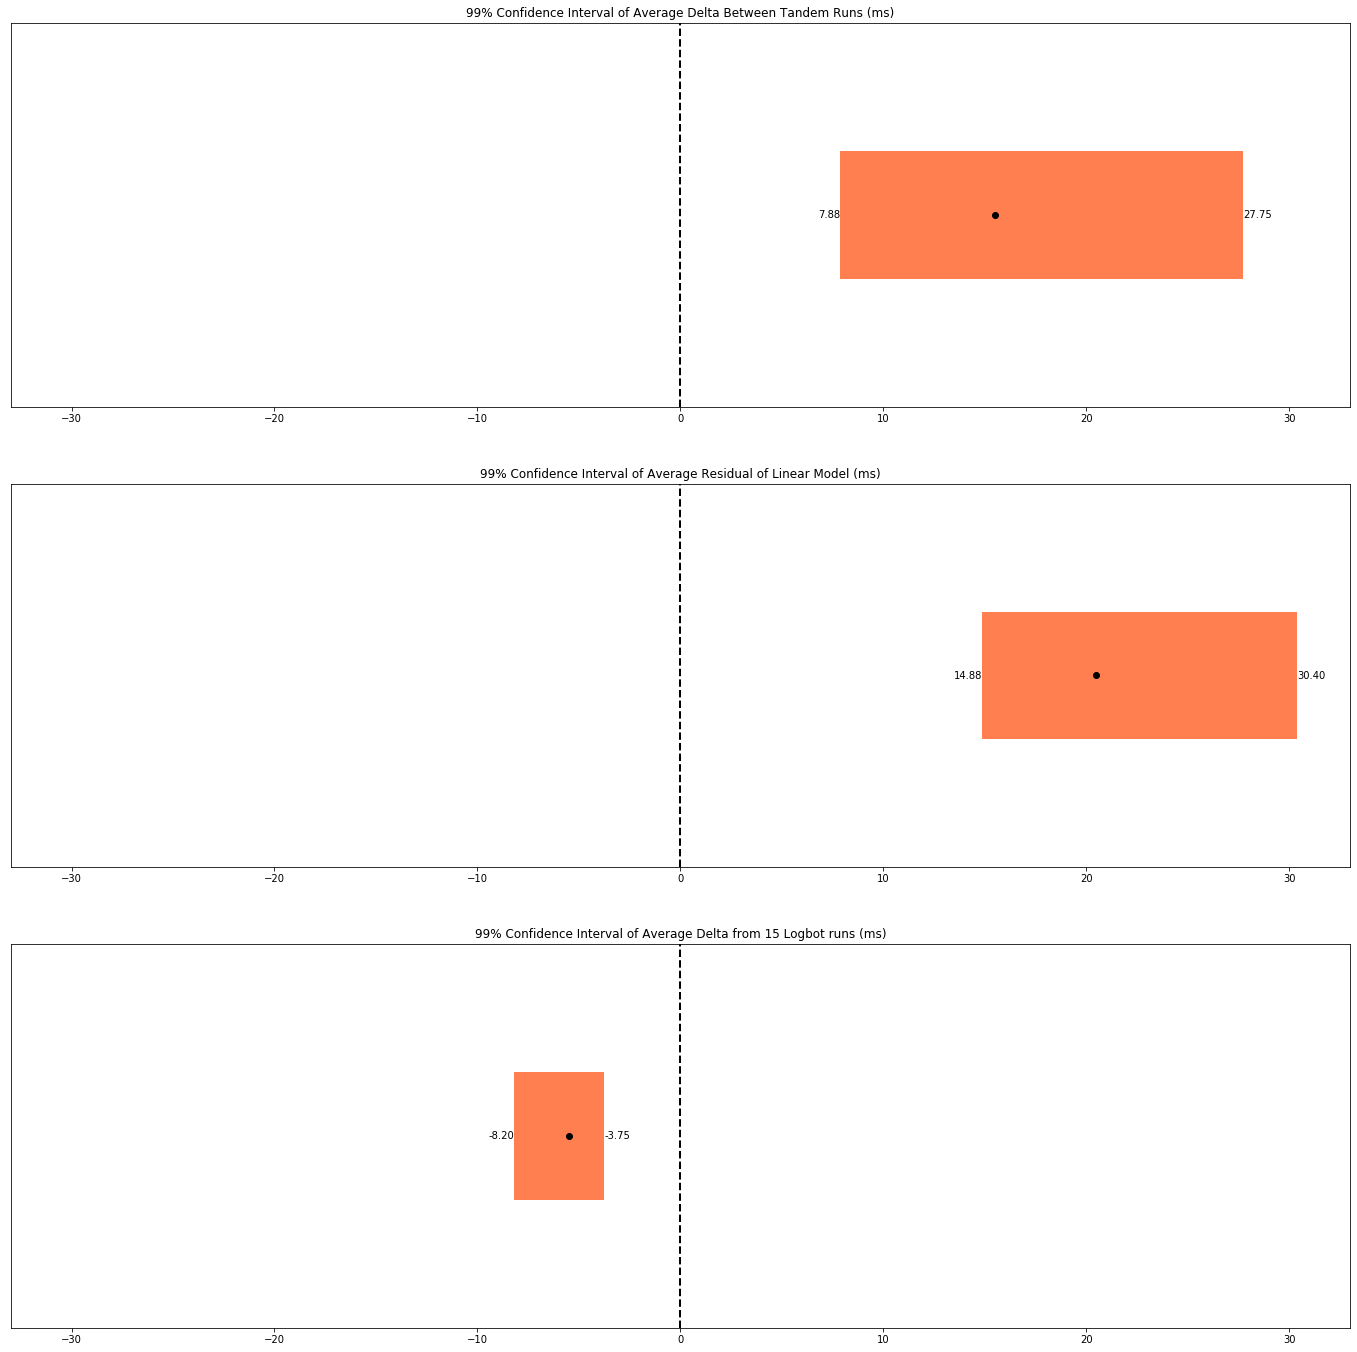

In [30]:
#NOTE: Edit the confidence intervals, means, padding and num_logbot_runs before plotting

lb_direct = 7.88
ub_direct = 27.75
mean_direct = 15.49

lb_lin_mod = 14.88
ub_lin_mod = 30.4
mean_lin_mod = 20.49

lb_logbot = -8.2
ub_logbot = -3.75
mean_logbot = -5.49
num_logbot_runs = 15

padding = 3

xlimit = max([abs(lb_direct), abs(ub_direct), abs(lb_lin_mod), abs(ub_lin_mod), abs(lb_logbot), abs(ub_logbot)]) + padding

fig = plt.figure(figsize=(24,24))

gs = gridspec.GridSpec(3,1)

ax1 = plt.subplot(gs[0,:])
ax2 = plt.subplot(gs[1,:])
ax3 = plt.subplot(gs[2,:])

ax1.barh(1, height=1, left=lb_direct, width=ub_direct-lb_direct, label='Direct comparison', color='coral')
ax1.annotate('%0.2f' % ub_direct, xy=(ub_direct, 1), ha='left', va='center')
ax1.annotate('%0.2f' % lb_direct, xy=(lb_direct, 1), ha='right',va='center')
ax1.plot(mean_direct, 1, marker='o', color='k', label=None)
ax1.axvline(x = 0, color='k', linewidth=2, linestyle='--')
ax1.set_xlim(-int(xlimit), int(xlimit))
ax1.set_ylim(-0.5,2.5)
ax1.set_yticks([])
ax1.set_title('99% Confidence Interval of Average Delta Between Tandem Runs (ms)')

ax2.barh(1, height=1, left=lb_lin_mod, width=ub_lin_mod-lb_lin_mod, label='Linear model', color='coral')
ax2.annotate('%0.2f' % ub_lin_mod, xy=(ub_lin_mod, 1), ha='left', va='center')
ax2.annotate('%0.2f' % lb_lin_mod, xy=(lb_lin_mod, 1), ha='right',va='center')
ax2.plot(mean_lin_mod, 1, marker='o', color='k', label=None)
ax2.axvline(x = 0, color='k', linewidth=2, linestyle='--')
ax2.set_xlim(-int(xlimit), int(xlimit))
ax2.set_ylim(-0.5,2.5)
ax2.set_yticks([])
ax2.set_title('99% Confidence Interval of Average Residual of Linear Model (ms)')


ax3.barh(1, height=1, left=lb_logbot, width=ub_logbot-lb_logbot, label='Logbot', color='coral')
ax3.annotate('%0.2f' % ub_logbot, xy=(ub_logbot, 1), ha='left', va='center')
ax3.annotate('%0.2f' % lb_logbot, xy=(lb_logbot, 1), ha='right',va='center')
ax3.plot(mean_logbot, 1, marker='o', color='k', label=None)
ax3.axvline(x = 0, color='k', linewidth=2, linestyle='--')
ax3.set_xlim(-int(xlimit), int(xlimit))
ax3.set_ylim(-0.5,2.5)
ax3.set_yticks([])
ax3.set_title('99% Confidence Interval of Average Delta from {} Logbot runs (ms)'.format(num_logbot_runs))

